# Degradation functions <a class="tocSkip">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Pitch-shift" data-toc-modified-id="Pitch-shift-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Pitch shift</a></span></li><li><span><a href="#Time-shift" data-toc-modified-id="Time-shift-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Time shift</a></span></li><li><span><a href="#Onset-shift" data-toc-modified-id="Onset-shift-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Onset shift</a></span></li><li><span><a href="#Offset-shift" data-toc-modified-id="Offset-shift-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Offset shift</a></span></li><li><span><a href="#Remove-note" data-toc-modified-id="Remove-note-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Remove note</a></span></li><li><span><a href="#Add-note" data-toc-modified-id="Add-note-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Add note</a></span></li><li><span><a href="#Split-note" data-toc-modified-id="Split-note-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Split note</a></span></li><li><span><a href="#Join-notes" data-toc-modified-id="Join-notes-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Join notes</a></span></li><li><span><a href="#Args-for-all-functions" data-toc-modified-id="Args-for-all-functions-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Args for all functions</a></span></li></ul></div>

In this notebook, we simply show what degradation functions are available and their parameters.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Audio, display

from mdtk.degradations import (
    pitch_shift,
    time_shift,
    onset_shift,
    offset_shift,
    remove_note,
    add_note,
    split_note,
    join_notes,
)
from utils import plot_against_orig, plot_from_df, synthesize_from_note_df

First, we will construct some example data to degrade

In [2]:
pitches = [64, 64, 65, 67, 67, 65, 64, 62, 60, 60, 62, 64, 64, 62, 62]
bpm = 120
beat_dur = 60/bpm * 1000
durations = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1.5, .5, 2]
durations = [beats*beat_dur for beats in durations]
onsets = [sum(durations[:ii]) for ii in range(len(durations))]
velocities = [pitch + 20 for pitch in pitches]
excerpt = pd.DataFrame(
    {
        "onset": onsets,
        "pitch": pitches,
        "dur": durations,
        "velocity": velocities,
    }
)
excerpt["track"] = 0

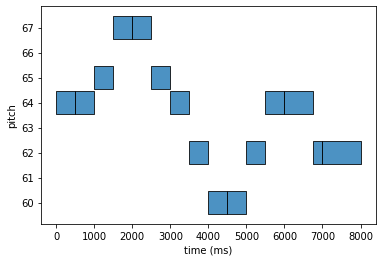

In [3]:
plot_from_df(excerpt)

In [4]:
Audio(synthesize_from_note_df(excerpt), rate=16000)

# Pitch shift

Apply a pitch shift to one random note within the excerpt. Minimum and maximum pitches can be supplied. A distribution indicating relative probabilities of shifting the note up or down can be supplied.

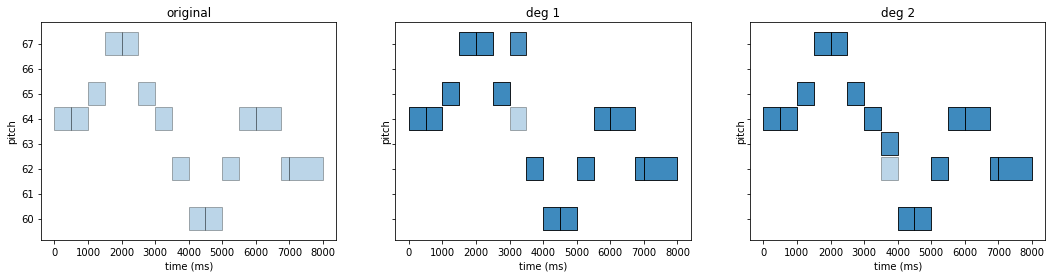

In [5]:
min_pitch = 60  # cant shift lower than 60
max_pitch = 68  # cant shift highter than 68
distribution = [1, 0, 1, 0, 1, 0, 1]  # only shift min 2nd or maj 3rd up/down

deg_excerpt_1 = pitch_shift(
    excerpt,
    min_pitch=min_pitch,
    max_pitch=max_pitch,
    distribution=distribution,
    seed=42
)
deg_excerpt_2 = pitch_shift(
    excerpt,
    min_pitch=min_pitch,
    max_pitch=max_pitch,
    distribution=distribution,
    seed=1337
)
plot_against_orig(excerpt, [deg_excerpt_1, deg_excerpt_2])

In [6]:
display(Audio(synthesize_from_note_df(deg_excerpt_1), rate=16000))
display(Audio(synthesize_from_note_df(deg_excerpt_2), rate=16000))

In [7]:
?pitch_shift

Signature:
pitch_shift(
    excerpt,
    min_pitch=21,
    max_pitch=108,
    align_pitch=False,
    distribution=None,
    abs_distribution=None,
    tries=10,
)
Docstring:
Shift the pitch of one note from the given excerpt.

Parameters
----------
excerpt : pd.DataFrame
    An excerpt from a piece of music.

min_pitch : int
    The minimum pitch to which a note may be shifted.

max_pitch : int
    The maximum pitch to which a note may be shifted.

align_pitch : bool
    Align the note's new pitch to an existing pitch of another note.
    If the given excerpt has only 1 note, align_pitch is set to False.

distribution : list(float)
    If given, a list describing the distribution of pitch shifts.
    Element (len(distribution) // 2) refers to the note's original
    pitch, and will be set to 0. Additionally, pitches outside of the
    range [min_pitch, max_pitch] will also be set to 0. The distribution
    will then be normalized to sum to 1, and used to generate a new
    pitch. None 

# Time shift

Apply a time shift to one random note within the excerpt. Minimum and maximum shifts can be supplied. Can insist that the shifted note aligns with the onset of another in the excerpt.

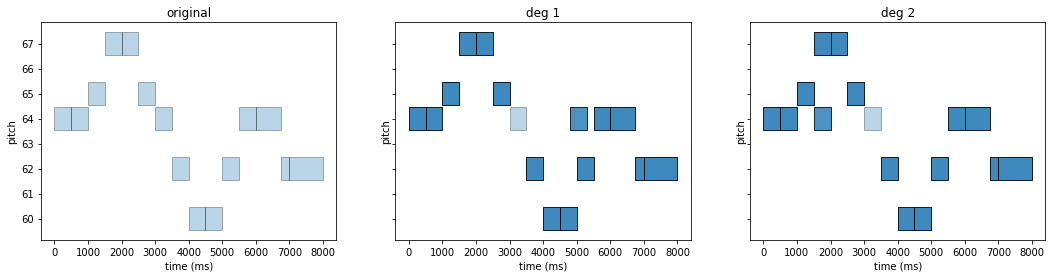

In [8]:
min_shift = 500  # dont shift less than .5s
max_shift = 10_000   # dont shift more than 10s

deg_excerpt_1 = time_shift(
    excerpt,
    min_shift=min_shift,
    max_shift=max_shift,
    align_onset=False,  # don't align shift with an existing note
    seed=42
)
deg_excerpt_2 = time_shift(
    excerpt,
    min_shift=min_shift,
    max_shift=max_shift,
    align_onset=True,  # align shift with an existing note
    seed=42
)
plot_against_orig(excerpt, [deg_excerpt_1, deg_excerpt_2])

In [9]:
display(Audio(synthesize_from_note_df(deg_excerpt_1), rate=16000))
display(Audio(synthesize_from_note_df(deg_excerpt_2), rate=16000))

In [10]:
?time_shift

Signature:
time_shift(
    excerpt,
    min_shift=100,
    max_shift=inf,
    align_onset=False,
    tries=10,
)
Docstring:
Shift the onset and offset times of one note from the given excerpt,
leaving its duration unchanged.

Parameters
----------
excerpt : pd.DataFrame
    An excerpt from a piece of music.

min_shift : int
    The minimum amount by which the note will be shifted.

max_shift : int
    The maximum amount by which the note will be shifted.

align_onset : boolean
    Align the shifted note to the onset time of an existing note
    (within the given shift range).

seed : int
    A seed to be supplied to np.random.seed(). None leaves numpy's
    random state unchanged.

tries : int
    The number of times to try the degradation before giving up, in the case
    that the degraded excerpt overlaps.


Returns
-------
degraded : pd.DataFrame
    A degradation of the excerpt, with the timing of one note changed,
    or None if there are no notes that can be changed.
File:      /

# Onset shift

Shift the onset time (time the note begins) for an existing note

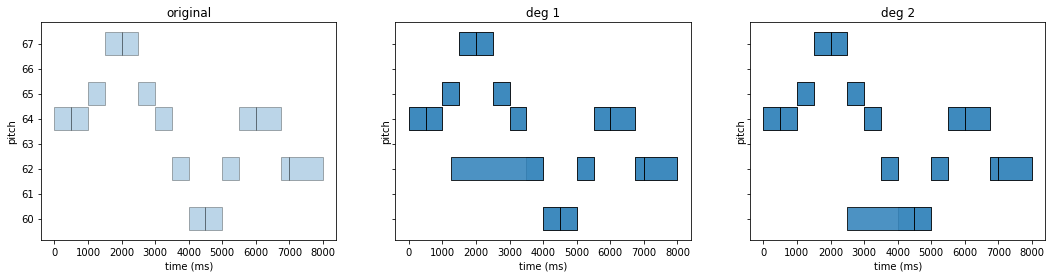

In [11]:
min_shift = 10  # dont shift less than .01s
max_shift = 10_000   # dont shift more than 10s

deg_excerpt_1 = onset_shift(
    excerpt,
    min_shift=min_shift,
    max_shift=max_shift,
    align_onset=False,  # don't align shift with an existing note
    seed=1337
)
deg_excerpt_2 = onset_shift(
    excerpt,
    min_shift=min_shift,
    max_shift=max_shift,
    align_onset=True,  # align shift with an existing note
    seed=1337
)
plot_against_orig(excerpt, [deg_excerpt_1, deg_excerpt_2])

In [12]:
display(Audio(synthesize_from_note_df(deg_excerpt_1), rate=16000))
display(Audio(synthesize_from_note_df(deg_excerpt_2), rate=16000))

In [13]:
?onset_shift

Signature:
onset_shift(
    excerpt,
    min_shift=100,
    max_shift=inf,
    min_duration=50,
    max_duration=inf,
    align_onset=False,
    align_dur=False,
    tries=10,
)
Docstring:
Shift the onset time of one note from the given excerpt.

Parameters
----------
excerpt : df.DataFrame
    An excerpt from a piece of music.

min_shift : int
    The minimum amount by which the onset time will be changed.

max_shift : int
    The maximum amount by which the onset time will be changed.

min_duration : int
    The minimum duration for the resulting note.

max_duration : int
    The maximum duration for the resulting note.
    (The offset time will never go beyond the current last offset
    in the excerpt.)

align_onset : boolean
    True to force the shifted onset to lie on an existing onset.

align_dur : boolean
    True to force the resulting duration to be equal to an existing
    duration.

seed : int
    A seed to be supplied to np.random.seed(). None leaves numpy's
    random st

# Offset shift

Shift the offset time (time the note ends) for an existing note

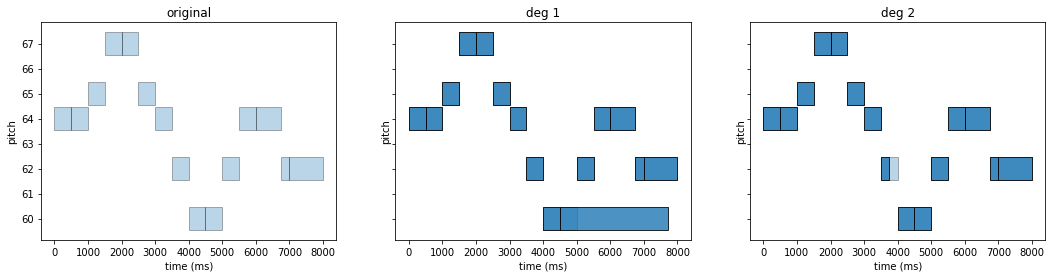

In [14]:
min_shift = 10  # dont shift less than .01s
max_shift = 10_000   # dont shift more than 10s

deg_excerpt_1 = offset_shift(
    excerpt,
    min_shift=min_shift,
    max_shift=max_shift,
    align_dur=False,  # don't force duration to match an existing note
    seed=1337
)
deg_excerpt_2 = offset_shift(
    excerpt,
    min_shift=min_shift,
    max_shift=max_shift,
    align_dur=True,  # force duration to match an existing note
    seed=1337
)
plot_against_orig(excerpt, [deg_excerpt_1, deg_excerpt_2])

In [15]:
display(Audio(synthesize_from_note_df(deg_excerpt_1), rate=16000))
display(Audio(synthesize_from_note_df(deg_excerpt_2), rate=16000))

In [16]:
?offset_shift

Signature:
offset_shift(
    excerpt,
    min_shift=100,
    max_shift=inf,
    min_duration=50,
    max_duration=inf,
    align_dur=False,
    tries=10,
)
Docstring:
Shift the offset time of one note from the given excerpt.

Parameters
----------
excerpt : df.DataFrame
    An excerpt from a piece of music.

min_shift : int
    The minimum amount by which the offset time will be changed.

max_shift : int
    The maximum amount by which the offset time will be changed.

min_duration : int
    The minimum duration for the resulting note.

max_duration : int
    The maximum duration for the resulting note.
    (The offset time will never go beyond the current last offset
    in the excerpt.)

align_dur : boolean
    True to force the resulting duration to be the same as some
    other duration in the given excerpt.

seed : int
    A seed to be supplied to np.random.seed(). None leaves numpy's
    random state unchanged.

tries : int
    The number of times to try the degradation before gi

# Remove note

Remove a note from the excerpt

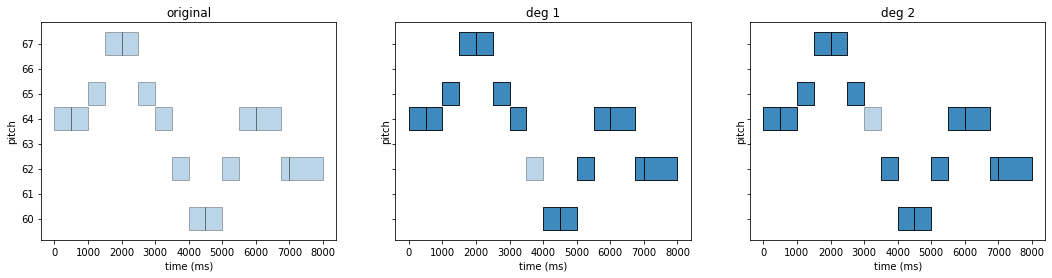

In [17]:
deg_excerpt_1 = remove_note(
    excerpt,
    seed=1337,
)
deg_excerpt_2 = remove_note(
    excerpt,
    seed=42,
)
plot_against_orig(excerpt, [deg_excerpt_1, deg_excerpt_2])

In [18]:
display(Audio(synthesize_from_note_df(deg_excerpt_1), rate=16000))
display(Audio(synthesize_from_note_df(deg_excerpt_2), rate=16000))

In [19]:
?remove_note

Signature: remove_note(excerpt, tries=10)
Docstring:
Remove one note from the given excerpt.

Parameters
----------
excerpt : df.DataFrame
    An excerpt from a piece of music.

seed : int
    A seed to be supplied to np.random.seed(). None leaves numpy's
    random state unchanged.

tries : int
    The number of times to try the degradation before giving up, in the case
    that the degraded excerpt overlaps. This is not used, but we keep it for
    consistency.

Returns
-------
degraded : df.DataFrame
    A degradation of the excerpt, with one note removed, or None if
    the degradations cannot be performed.
File:      /mnt/c/Users/apmcl/Documents/GitHub/midi_degradation_toolkit/mdtk/degradations.py
Type:      function



# Add note

Add a completely new note to the excerpt with configurable min and max pitches, durations, and velocities. The added note can also be aligned in pitch, time, and/or velocity with an existing note within the excerpt. By default, any added note will have velocity 100.

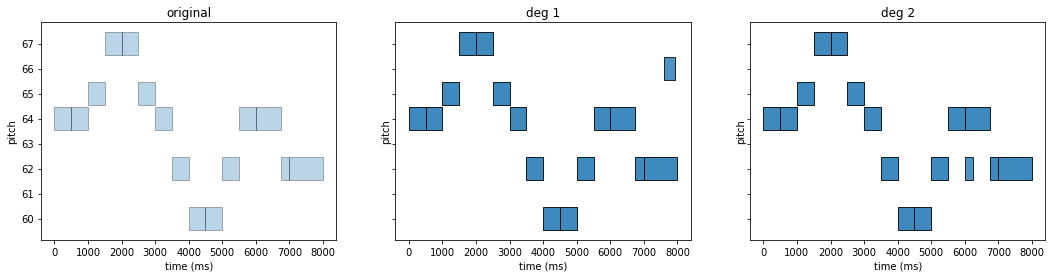

In [20]:
min_pitch = 60  # no pitch lower than 60
max_pitch = 68  # no pitch highter than 68
min_dur = 50
max_dur = 5_000
min_velocity = 60
max_velocity = 100

deg_excerpt_1 = add_note(
    excerpt,
    min_pitch=min_pitch,
    max_pitch=max_pitch,
    min_duration=min_dur,
    max_duration=max_dur,
    min_velocity=min_velocity,
    max_velocity=max_velocity,
    align_pitch=False,
    align_time=False,
    align_velocity=False,
    seed=42
)
deg_excerpt_2 = add_note(
    excerpt,
    min_pitch=min_pitch,
    max_pitch=max_pitch,
    min_duration=min_dur,
    max_duration=max_dur,
    min_velocity=min_velocity,
    max_velocity=max_velocity,
    align_pitch=True,
    align_time=True,
    align_velocity=True,
    seed=42
)
plot_against_orig(excerpt, [deg_excerpt_1, deg_excerpt_2])

In [21]:
display(Audio(synthesize_from_note_df(deg_excerpt_1), rate=16000))
display(Audio(synthesize_from_note_df(deg_excerpt_2), rate=16000))

In [22]:
?add_note

Signature:
add_note(
    excerpt,
    min_pitch=21,
    max_pitch=108,
    min_duration=50,
    max_duration=inf,
    min_velocity=100,
    max_velocity=100,
    align_pitch=False,
    align_time=False,
    align_velocity=False,
    pitch_distribution=None,
    tries=10,
)
Docstring:
Add one note to the given excerpt. The added note's track will be randomly
set to an existing one (if there are any). If the given excerpt is empty,
track=0. By default, the added note will have velocity 100, but this can
be changed with min_ and max_velocity.

Parameters
----------
excerpt : df.DataFrame
    An excerpt from a piece of music.

min_pitch : int
    The minimum pitch at which a note may be added.

max_pitch : int
    The maximum pitch at which a note may be added.

min_duration : int
    The minimum duration for the note to be added.

max_duration : int
    The maximum duration for the added note.
    (The offset time will never go beyond the current last offset
    in the excerpt.)

min_velo

# Split note

Split an existing note in the excerpt a given number of times.

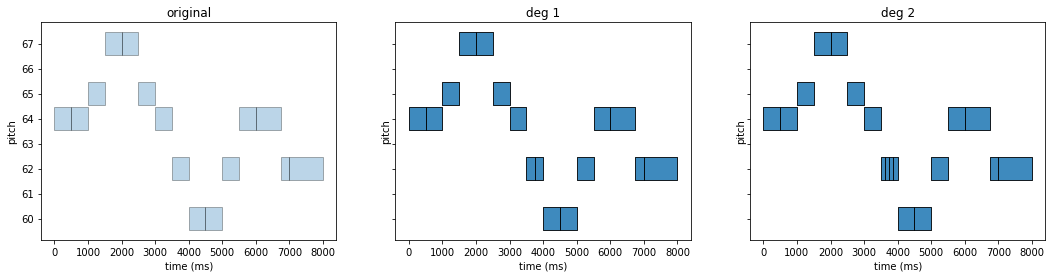

In [23]:
min_duration = 100  # dont create notes less than .1s

deg_excerpt_1 = split_note(
    excerpt,
    min_duration=min_duration,
    num_splits=1,
    seed=1337
)
deg_excerpt_2 = split_note(
    excerpt,
    min_duration=min_duration,
    num_splits=3,
    seed=1337
)
plot_against_orig(excerpt, [deg_excerpt_1, deg_excerpt_2])

In [24]:
display(Audio(synthesize_from_note_df(deg_excerpt_1), rate=16000))
display(Audio(synthesize_from_note_df(deg_excerpt_2), rate=16000))

In [25]:
?split_note

Signature: split_note(excerpt, min_duration=50, num_splits=1, tries=10)
Docstring:
Split one note from the excerpt into two or more notes of equal
duration. The resulting notes' velocites will be equal to the split note's
velocity.

Parameters
----------
excerpt : df.DataFrame
    An excerpt from a piece of music.

min_duration : int
    The minimum length for any of the resulting notes.

num_splits : int
    The number of splits to make in the chosen note. The note will
    be split into (num_splits+1) shorter notes.

seed : int
    A seed to be supplied to np.random.seed(). None leaves numpy's
    random state unchanged.

tries : int
    The number of times to try the degradation before giving up, in the case
    that the degraded excerpt overlaps. This is not used, but we keep it for
    consistency.

Returns
-------
degraded : df.DataFrame
    A degradation of the excerpt, with one note split, or None if
    the degradation cannot be performed.
File:      /mnt/c/Users/apmcl/Documen

# Join notes

Join a given number of existing notes together.

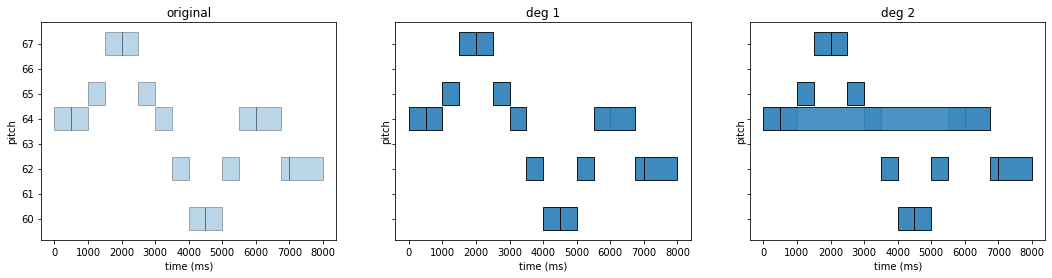

In [26]:
max_gap = 2000  # max gap between notes to join is 2s

deg_excerpt_1 = join_notes(
    excerpt,
    max_gap=max_gap,
    max_notes=2,
    seed=1337
)
deg_excerpt_2 = join_notes(
    excerpt,
    max_gap=max_gap,
    max_notes=20,
    seed=0
)
plot_against_orig(excerpt, [deg_excerpt_1, deg_excerpt_2])

In [27]:
display(Audio(synthesize_from_note_df(deg_excerpt_1), rate=16000))
display(Audio(synthesize_from_note_df(deg_excerpt_2), rate=16000))

In [28]:
?join_notes

Signature: join_notes(excerpt, max_gap=50, max_notes=20, only_first=False, tries=10)
Docstring:
Combine two notes of the same pitch and track into one.

Parameters
----------
excerpt : df.DataFrame
    An excerpt from a piece of music.

max_gap : int
    The maximum gap length, in ms, for 2 notes to be able to be joined.
    (They must always share the same pitch and track).

max_notes : int
    The maximum number of notes to join together. This degradation will
    greedily join as many notes together as possible up to this value,
    starting from a randomly chosen note (which may or may not be the
    first note in a sequence, depending on only_first).

only_first : boolean
    True to always begin joining notes from the first note of a
    sequence of consecutive notes. False will choose a note randomly
    up to the 2nd-to-last note from all valid sequences.

seed : int
    A seed to be supplied to np.random.seed(). None leaves numpy's
    random state unchanged.

tries : int
    

# Args for all functions

All functions have a `seed` and `tries` arguments. 

The `seed` argument ensures the outcome is deterministic - the outcome is reproduced if the same seed is supplied (provided the same input is supplied!). 

The `tries` argument is there to handle difficult settings of the arguments. In these cases, the function will try `tries` attempts, and return none if no result is found.

For example, trying to split a note in our example into 10 parts of at minimum size 1s is never possible:

In [29]:
split_note(
    excerpt,
    min_duration=1000,
    num_splits=10,
    seed=1337
)

In some cases, a degradation may sometimes be possible, but not always. The user can increase the number of attempts using `tries`, to reduce the probability of failure.

In [30]:
new_excerpt = pd.DataFrame({
    "onset": [0, 500],
    "track": [0, 0],
    "pitch": [60, 61],
    "dur": [1000, 1000],
    "velocity": [100, 100],
})

In [31]:
pitch_shift(
    new_excerpt,
    min_pitch=60,
    max_pitch=62,
    seed=0,
    tries=2,
)

In [32]:
pitch_shift(
    new_excerpt,
    min_pitch=60,
    max_pitch=62,
    seed=0,
    tries=3,
)

onset  track  pitch   dur  velocity
0      0      0     60  1000       100
1    500      0     62  1000       100